In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
from Classifiers import CNN_Classifier
from preprocessor import CTPreprocessor

In [2]:
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),  # Resize to a fixed size if needed
#     transforms.Grayscale(),
#     transforms.ToTensor()         # Convert the image to a PyTorch Tensor
# ]) 
transform = CTPreprocessor((256,256))
dataset = ImageFolder(root="./Data/Compiled/PNG/", transform=transform)
train_dataset, val_dataset, test_dataset = random_split(dataset, [0.6, 0.2, 0.2])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [3]:
train_loader.batch_size

32

In [4]:
# Function to unnormalize and display an image
def imshow(img, title):
    # img = img / 2 + 0.5  # Unnormalize
    # axes, fig = plt.figure(num = (1,4), figsize=(5,12)) 
    npimg = img.numpy()
    # plt.title()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[labels == 0][:3], padding=20, pad_value=1), dataset.classes[0])
imshow(torchvision.utils.make_grid(images[labels == 1][:3], padding=20, pad_value=1), dataset.classes[1])
imshow(torchvision.utils.make_grid(images[labels == 2][:3], padding=20, pad_value=1), dataset.classes[2])

# Print labels
# print(' '.join(f'{dataset.classes[labels[j]]}' for j in range(4)))


TypeError: img should be Tensor Image. Got <class 'PIL.Image.Image'>

In [4]:
torch.cuda.empty_cache()
model = CNN_Classifier(images.shape)
model.to("cuda")
model.getSummary()

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
Sequential                               [32, 1, 256, 256]         [32, 3]                   --
├─Conv2d: 1-1                            [32, 1, 256, 256]         [32, 256, 128, 128]       2,560
├─Conv2d: 1-2                            [32, 256, 128, 128]       [32, 128, 128, 128]       295,040
├─MaxPool2d: 1-3                         [32, 128, 128, 128]       [32, 128, 64, 64]         --
├─Dropout2d: 1-4                         [32, 128, 64, 64]         [32, 128, 64, 64]         --
├─LeakyReLU: 1-5                         [32, 128, 64, 64]         [32, 128, 64, 64]         --
├─Conv2d: 1-6                            [32, 128, 64, 64]         [32, 64, 32, 32]          73,792
├─Conv2d: 1-7                            [32, 64, 32, 32]          [32, 32, 32, 32]          18,464
├─MaxPool2d: 1-8                         [32, 32, 32, 32]          [32, 32, 16, 16]          --
├─LeakyReLU: 1-9   

In [5]:
def train(model):
    print("\n", "#"*80, sep="")
    print("\t\t\tTraining:")
    print("#"*80, "\n")
    
    total_steps = len(train_loader)
    p_counter = 0
    
    for epoch in range(start_epoch, total_epoch):
        
        self.startEpoch = epoch
        
        # Training
        self.model.train()
        step_losses = []
        min_valLoss = min(self.val_losses) if(len(self.val_losses)) else 100
        print("\t" + "-"*100)
        print("\t" + "EPOCH: [%d/%d]\t\t\t\t\t\t\t\t\tp_counter: %d" % (epoch+1, total_epoch, p_counter))
        print("\t" +"-"*100)
        for i, train_data in enumerate((train_loader), 0):
            self.model.zero_grad()
            x,y = self._getXY(train_data)
            y_pred = self.model(x)
            error = loss(y_pred,y)
            error.backward()
            optimizer.step()
            step_losses.append(error.item())
            print("\t" +"\tSTEP: [%d/%d]\t\t\t\t\t\t>>>>>Batch Loss: [%0.5f]" % (i+1,total_steps,step_losses[-1]), end = "\r")
            self._doAfterStep()

        self.training_losses.append(round(sum(step_losses)/len(step_losses), 5))
        self._doAfterEpoch()
        print("\n\n\t" +"\tTraining Loss: %0.5f" % (self.training_losses[-1]))
        
        if(val_loader):
        # Validation
            self.model.eval()
            with torch.no_grad():
                val_loss = 0.0
                for val_data in val_loader:
                    x,y = self._getXY(val_data)
                    y_pred = self(x)
                    val_loss += loss(y_pred, y).item()
            val_loss /= len(val_loader)
            self.val_losses.append(round(val_loss,5))
            print("\t" +"\tValidation Loss: %0.5f" % (self.val_losses[-1]), end = "\n\n")
        
            p_counter += 1
            if(len(self.val_losses) > 1):
                if(self.val_losses[-1] < min_valLoss):
                    min_valLoss = self.val_losses[-1]
                    torch.save(self, path_modelSave)
                    p_counter = 0

            if(persistence and len(self.val_losses) >= persistence and p_counter == persistence):
                print("Validation Loss constant for", persistence, "Epochs")
                if(self._isDecreasing(self.training_losses[-persistence:])):
                    print("Stoping Training: Overfitting Detected")
                    break

                else:
                    print("Training Loss fluctuating -- ", self.training_losses[-persistence:])
                    while(True):
                        flag = input("keep training?(y/n)")
                        if(flag == "y" or flag =="n"):
                            p_counter = 0
                            break
                        else:
                            print("Wrong Input")
                    if(flag == "n"):
                        break
        else:
            torch.save(self, path_modelSave)

    if(test_loader):       
        self.testSequential(test_loader, path_modelSave, loss, labels)
    return 

SyntaxError: incomplete input (2734419996.py, line 1)

In [8]:
def plot_losses(training_losses, validation_losses, filename='loss_plot.png'):

    epochs = range(1, len(training_losses) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, training_losses, label='Training Loss', marker='o', linestyle='-', color='blue')
    plt.plot(epochs, validation_losses, label='Validation Loss', marker='x', linestyle='--', color='orange')

    # Add titles and labels
    plt.title('Training and Validation Losses Over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    
    # Set y-axis limits
    plt.ylim(0, max(max(training_losses), max(validation_losses)) * 1.1)  # Slightly higher than max loss

    # Adding a grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add a legend
    plt.legend(fontsize=12)

    # Save the figure
    plt.savefig(PATH_MODEL_SAVE + filename, bbox_inches='tight', dpi=300)
    plt.close()  # Close the figure to free memory

    print(f"Plot saved as {filename}")



In [3]:
np.savetxt("LOSSES.txt", ([1,2,3,4], [4,5,6,9]), fmt="%d" , delimiter=",")
    

In [4]:
# from torchviz import make_dot
from torchinfo import summary
import sys

# num = 2
# path = "./Classifiers/CNN_" + str(num) + "/"
# model = torch.load(path + "CNN_" + str(num) + ".pt")

# with open(path + "model_summary.txt", "w") as f:
#     f.write(str(summary(model, input_size=(1, 1, 256, 256))))

In [6]:
for num in range(1,5):
    print("\n\n" + str(num))
    path = "./Classifiers/CNN_" + str(num) + "/"
    print(path)
    print(path + "CNN_" + str(num) + ".pt")
    model = torch.load(path + "CNN_" + str(num) + ".pt")

    with open(path + "model_summary.txt", "w") as f:
        f.write(str(summary(model, input_size=(1, 1, 256, 256))))



1
./Classifiers/CNN_1/
./Classifiers/CNN_1/CNN_1.pt


2
./Classifiers/CNN_2/
./Classifiers/CNN_2/CNN_2.pt


3
./Classifiers/CNN_3/
./Classifiers/CNN_3/CNN_3.pt


4
./Classifiers/CNN_4/
./Classifiers/CNN_4/CNN_4.pt


In [3]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

def plot_precision_recall():
    classifier_path = "./Classifiers/"
    leakyRelu_precision = []
    leakyRelu_recall = []
    selu_precision = []
    selu_recall = []
        
    for folder in sorted(os.listdir(classifier_path)):
        print("FOLDER NAME: " , folder)
        path = classifier_path + folder + "/"
        with open(path + "performance.json" , "r") as f:
            data = json.load(f)
            h_p = data.get("Hemorrhagic").get("precision")
            h_r = data.get("Hemorrhagic").get("recall")

            i_p = data.get("Ischemic").get("precision")
            i_r = data.get("Ischemic").get("recall")

            n_p = data.get("Normal").get("precision")
            n_r = data.get("Normal").get("recall")

            if(len(folder) <= 5):
                # it is leaky relu
                leakyRelu_precision.append([h_p, i_p, n_p])
                leakyRelu_recall.append([h_r, i_r, n_r])
            else:
                selu_precision.append([h_p, i_p, n_p])
                selu_recall.append([h_r, i_r, n_r])
            
    leakyRelu_precision = np.array(leakyRelu_precision)
    leakyRelu_recall = np.array(leakyRelu_recall)
    selu_precision = np.array(selu_precision)
    selu_recall = np.array(selu_recall)
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    axs[0].plot([0,1,2,3], leakyRelu_precision[:, 0], label = "Precision Hemorrahagic (Leaky ReLU)", marker="o", color="lightgreen")
    axs[0].plot([0,1,2,3], selu_precision[:, 0], label = "Precision Hemorrahagic (SeLU)", marker="o", color="darkgreen")
    
    axs[0].plot([0,1,2,3], leakyRelu_precision[:, 1], label = "Precision Ischemic (Leaky ReLU)", marker="o", color = "red")
    axs[0].plot([0,1,2,3], selu_precision[:, 1], label = "Precision Ischemic (SeLU)", marker="o", color = "darkred")
    
    axs[0].plot([0,1,2,3], leakyRelu_precision[:, 2], label = "Precision Normal (Leaky ReLU)", marker="o", color = "lightblue")
    axs[0].plot([0,1,2,3], selu_precision[:, 2], label = "Precision Normal (SeLU)", marker="o", color = "darkblue")
    
    
    axs[1].plot([0,1,2,3], leakyRelu_recall[:, 0], label = "Recall Hemorrahagic (Leaky ReLU)", marker="o", color="lightgreen")
    axs[1].plot([0,1,2,3], selu_recall[:, 0], label = "Recall Hemorrahagic (SeLU)", marker="o", color="darkgreen")
    
    axs[1].plot([0,1,2,3], leakyRelu_recall[:, 1], label = "Recall Ischemic (Leaky ReLU)", marker="o", color="red")
    axs[1].plot([0,1,2,3], selu_recall[:, 1], label = "Recall Ischemic (SeLU)", marker="o", color="darkred")
    
    axs[1].plot([0,1,2,3], leakyRelu_recall[:, 2], label = "Recall Normal (Leaky ReLU)", marker="o", color="lightblue")
    axs[1].plot([0,1,2,3], selu_recall[:, 2], label = "Recall Normal (SeLU)", marker="o", color="darkblue")

    # axs[0].plot([43587, 37379, 33539, 771], precision_values[:, 0], label = "Precision Hemorrahagic", marker="o")
    # axs[0].plot([43587, 37379, 33539, 771], precision_values[:, 1], label = "Precision Ischemic", marker="o")
    # axs[0].plot([43587, 37379, 33539, 771], precision_values[:, 2], label = "Precision Normal", marker="o")
    
    # axs[1].plot([43587, 37379, 33539, 771], recall_values[:, 0], label = "Recall Hemorrahagic", marker="o")
    # axs[1].plot([43587, 37379, 33539, 771], recall_values[:, 1], label = "Recall Ischemic", marker="o")
    # axs[1].plot([43587, 37379, 33539, 771], recall_values[:, 2], label = "Recall Normal", marker="o")

    # axs[0].legend()
    axs[0].set_xlabel("Decreasing Linear Layer")
    axs[0].set_ylabel("Precision")
    # axs[0].set_title("Precision")
    # axs[1].legend()
    axs[1].set_xlabel("Decreasing Linear Layer")
    axs[0].set_ylabel("Recall")
    # axs[1].set_title("Recall")

    axs[0].legend(loc="center left", bbox_to_anchor=(1.0, 0.5), frameon=False)
    axs[1].legend(loc="center left", bbox_to_anchor=(1.0, 0.5), frameon=False)

    plt.tight_layout()  # Adjust spacing to fit titles and labels
    plt.show()

FOLDER NAME:  CNN_1
FOLDER NAME:  CNN_1SO
FOLDER NAME:  CNN_2
FOLDER NAME:  CNN_2SO
FOLDER NAME:  CNN_3
FOLDER NAME:  CNN_3SO
FOLDER NAME:  CNN_4
FOLDER NAME:  CNN_4SO


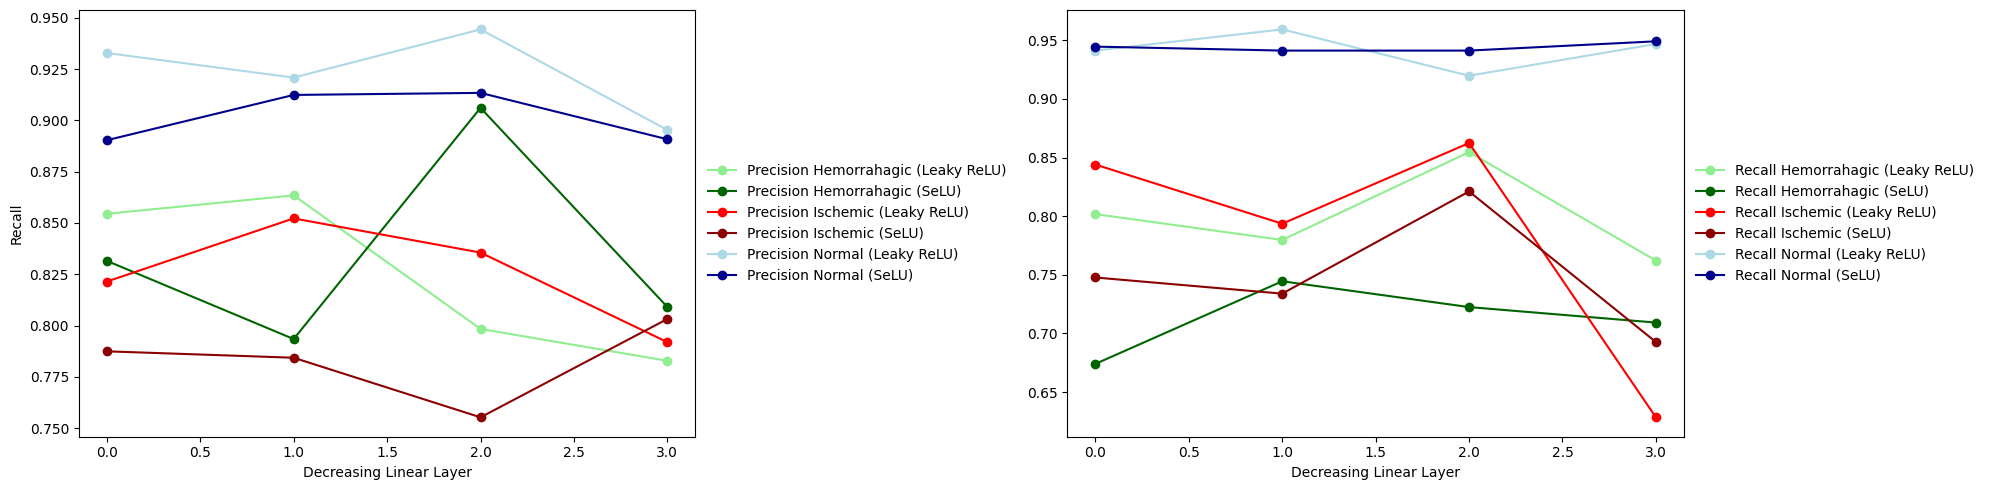

In [4]:
plot_precision_recall()

In [171]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

def imshow(img, title = "temp_img"):
    if isinstance(img, torch.Tensor):  # Check if `img` is a PyTorch tensor
        npimg = np.transpose(img.numpy(), (1, 2, 0))
    elif isinstance(img, np.ndarray):
        npimg = img
    plt.imshow(npimg, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

def get_mask(image: torch.tensor, show_all = False, show_last = True):
    image_np = (np.transpose(image.detach().numpy(), (1, 2, 0)))
    image_np = cv2.normalize(image_np, None, 0, 255, cv2.NORM_MINMAX)

    # Binarize the image
    _, binary_mask = cv2.threshold(image_np, 100, 255, cv2.THRESH_BINARY)

    # Erode the binary mask
    kernel = np.ones((2, 2), np.uint8)
    eroded_mask = cv2.erode(binary_mask, kernel, iterations=6)
    blurred_mask = cv2.blur(eroded_mask, (25,25))
    # blurred_mask = cv2.medianBlur(blurred_mask, 3)
    # dilated_mask = cv2.dilate(blurred_mask, kernel, iterations=5)
    # _, binary_mask2 = cv2.threshold(dilated_mask, 5, 255, cv2.THRESH_BINARY)
    # imshow(binary_mask2, "binary mask 2")
    
    # imshow(blurred_mask.astype(np.uint8), "Erosion np.uint8")

    # Find contours
    contours, _ = cv2.findContours(blurred_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_mask = cv2.drawContours(blurred_mask.copy(), contours, -1, (255), thickness=cv2.FILLED)


    # Flood fill
    flood_filled_mask = contour_mask.copy()
    height, width = flood_filled_mask.shape
    mask = np.zeros((height + 2, width + 2), np.uint8)
    cv2.floodFill(flood_filled_mask, mask, seedPoint=(0, 0), newVal=0)

    # Convert to PyTorch tensor
    mask_tensor = transforms.ToTensor()(Image.fromarray(flood_filled_mask))

    if (show_all):
        imshow(binary_mask, "THRESHOLDING")
        imshow(eroded_mask, "EROSION")
        imshow(blurred_mask, "BLURRING")
        # imshow(dilated_mask, "DILATION")
        imshow(contour_mask, "CONTOUR")
        imshow(flood_filled_mask, "FLODD FILL")
        imshow(mask_tensor, "FINAL")
    elif(show_last):
        imshow(mask_tensor, "FINAL")
    
    return torch.tensor(mask_tensor)

transform = transforms.Compose([transforms.Grayscale() ,transforms.ToTensor()])
imgs_names = sorted(os.listdir("Data/Compiled/PNG/Hemorrhagic"))

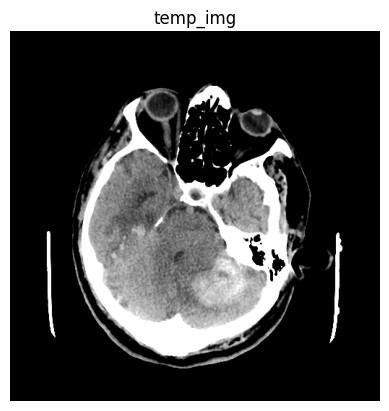

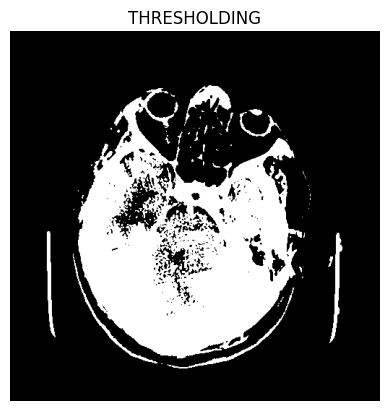

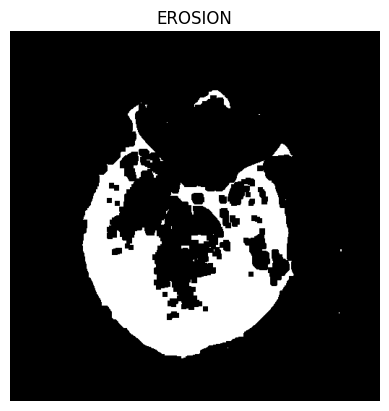

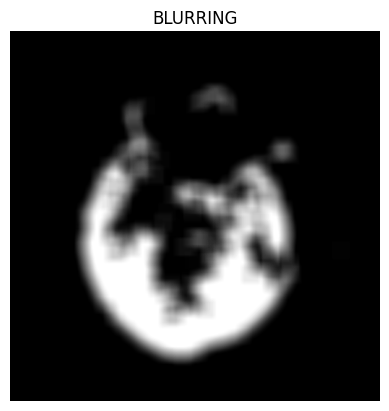

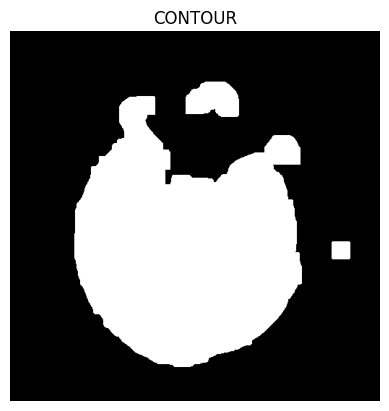

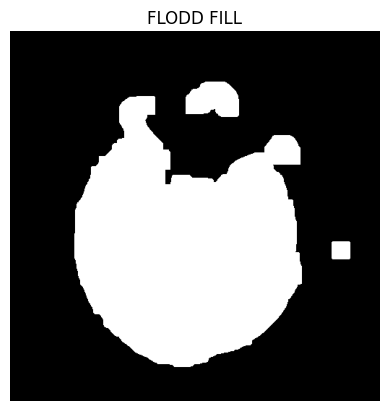

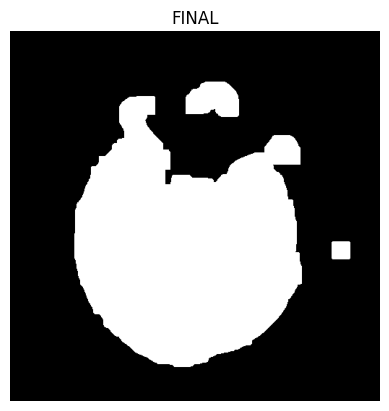

/tmp/ipykernel_616147/550736186.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask_tensor)


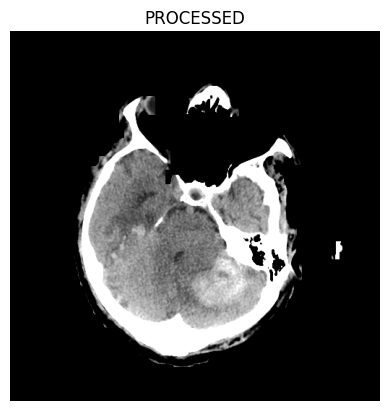

In [172]:
i = 11

image_path = "Data/Compiled/PNG/Hemorrhagic/" + imgs_names[i]
image = Image.open(image_path)
image = transform(image)
imshow(image)
mask = get_mask(image, show_all=True)
imshow(image * mask, "PROCESSED")

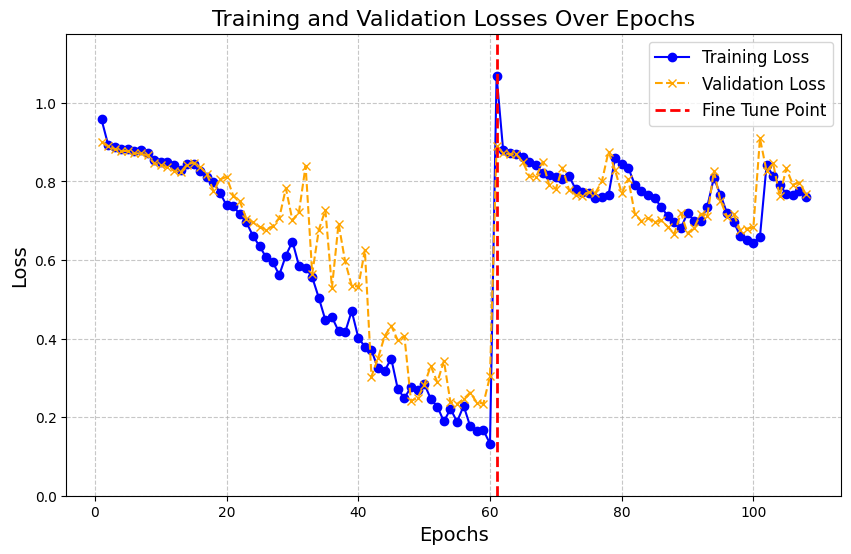

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_lossFT(model_name):
    path_losses_1 = "Classifiers/Transformer Networks/" + model_name + "/LOSSES.txt"
    path_losses_2 = "Classifiers/Transformer Networks/" + model_name + "_FT" + "/LOSSES.txt"

    if(not os.path.exists(path_losses_2)):
        print("ERROR")
        return
    else:
        train_losses_1, val_losses_1 = np.loadtxt(path_losses_1, delimiter=",")
        train_losses_2, val_losses_2 = np.loadtxt(path_losses_2, delimiter=",")
        
        
        training_losses = np.hstack([train_losses_1, train_losses_2])
        validation_losses = np.hstack([val_losses_1, val_losses_2])
        epochs = range(1, len(training_losses) + 1)
    
        plt.figure(figsize=(10, 6))
        plt.plot(epochs, training_losses, label='Training Loss', marker='o', linestyle='-', color='blue')
        plt.plot(epochs, validation_losses, label='Validation Loss', marker='x', linestyle='--', color='orange')
        plt.axvline(x=len(train_losses_1)+1, label='Fine Tune Point', color='red', linestyle='--', linewidth=2)

        # Add titles and labels
        plt.title('Training and Validation Losses Over Epochs', fontsize=16)
        plt.xlabel('Epochs', fontsize=14)
        plt.ylabel('Loss', fontsize=14)
        
        # Set y-axis limits
        plt.ylim(0, max(max(training_losses), max(validation_losses)) * 1.1)  # Slightly higher than max loss

        # Adding a grid
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Add a legend
        plt.legend(fontsize=12)
        plt.show()

        # Save the figure
        # plt.savefig(PATH_MODEL_SAVE + filename, bbox_inches='tight', dpi=300)
        plt.close()  # Close the figure to free memory

plot_lossFT("ViT_B16_5")

In [3]:
plot_lossFT("ViT_B16_3_FT")